In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [117]:
Data1 = genfromtxt('MCI_Data.csv', delimiter=',')

In [118]:
Labels = genfromtxt('MCI_Labels.csv', delimiter=',')

In [119]:
Data1.shape

(210, 131)

In [120]:
std1=np.std(Data1, axis=0)
index1=(std1!=0)
Data2=Data1[:,index1]
print(Data2.shape)

(210, 126)


In [121]:
min1=np.min(Data2, axis=0)
max1=np.max(Data2, axis=0)
print(min1.shape, max1.shape)
Data3=(Data2-min1)/(max1-min1)
print(Data3.shape)

(126,) (126,)
(210, 126)


In [122]:
X=Data3
y=Labels

In [123]:
arr1=np.array([3, 2, 1,4 ,5])
arr2=-1*arr1
np.argsort(arr2)

array([4, 3, 0, 1, 2], dtype=int64)

In [124]:
def FDR(X, y):
  #y=np.reshape(y, (y.shape[0],1))
  index0=(y==0)
  index1=(y==1)
  X1=X[index0,:]
  X2=X[index1, :]
  #print(X1.shape, X2.shape)
  m1=np.mean(X1, axis=0)
  m2=np.mean(X2, axis=0)
  s1=np.std(X1, axis=0)
  s2=np.std(X2, axis=0)
  fdr=((m1-m2)**2)/(s1**2 + s2**2)
  #print(fdr.shape)
  fdr1=-1*fdr
  index3=np.argsort(fdr1)
  return index3  

In [125]:
fdr_order=FDR(X,y)
X=X[:, fdr_order]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [127]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 126) (70, 126) (140,) (70,)


In [128]:
clf = SVC(gamma='auto')
acc=[]
for i in range(1, X.shape[1]):
  X1=X[:,:i]
  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  a=np.sum(y_pred==y_test)/y_test.shape
  acc.append(a)

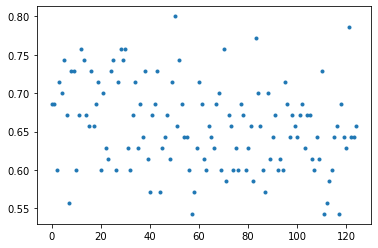

In [129]:
plt.plot(acc, '.')

In [130]:
acc

[array([0.68571429]),
 array([0.68571429]),
 array([0.6]),
 array([0.71428571]),
 array([0.7]),
 array([0.74285714]),
 array([0.67142857]),
 array([0.55714286]),
 array([0.72857143]),
 array([0.72857143]),
 array([0.6]),
 array([0.67142857]),
 array([0.75714286]),
 array([0.74285714]),
 array([0.67142857]),
 array([0.65714286]),
 array([0.72857143]),
 array([0.65714286]),
 array([0.68571429]),
 array([0.71428571]),
 array([0.6]),
 array([0.7]),
 array([0.62857143]),
 array([0.61428571]),
 array([0.72857143]),
 array([0.74285714]),
 array([0.6]),
 array([0.71428571]),
 array([0.75714286]),
 array([0.74285714]),
 array([0.75714286]),
 array([0.62857143]),
 array([0.6]),
 array([0.67142857]),
 array([0.71428571]),
 array([0.62857143]),
 array([0.68571429]),
 array([0.64285714]),
 array([0.72857143]),
 array([0.61428571]),
 array([0.57142857]),
 array([0.67142857]),
 array([0.68571429]),
 array([0.72857143]),
 array([0.57142857]),
 array([0.62857143]),
 array([0.64285714]),
 array([0.67142

In [131]:
max_acc=np.max(acc)
final_index=np.argmax(acc)
print(max_acc, final_index)

0.8 50


In [132]:
clf = SVC(kernel="linear")
acc=[]
for i in range(1, X.shape[1]):
  X1=X[:,:i]
  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  a=np.sum(y_pred==y_test)/y_test.shape
  acc.append(a)

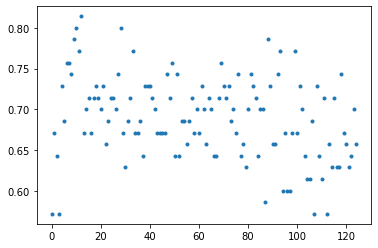

In [133]:
plt.plot(acc, '.')

In [134]:
max_acc=np.max(acc)
final_index=np.argmax(acc)
print(max_acc, final_index)

0.8142857142857143 12


In [135]:
c = np.linspace(0.1, 100, 100)
final_acc=[]
for cost in c:
  clf = SVC(kernel="linear", C=cost)
  acc=[]
  for i in range(1, X.shape[1]):
    X1=X[:,:i]
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    a=np.sum(y_pred==y_test)/y_test.shape
    acc.append(a)
  max_acc=np.max(acc)
  final_index=np.argmax(acc)
  print(max_acc, final_index)
  final_acc.append(max_acc)
  

0.7857142857142857 30
0.8571428571428571 29
0.8 9
0.8285714285714286 7
0.8 3
0.8142857142857143 46
0.8 32
0.8142857142857143 31
0.8 16
0.8285714285714286 75
0.8 8
0.7857142857142857 22
0.8 5
0.8285714285714286 43
0.8 20
0.7857142857142857 0
0.8428571428571429 95
0.8285714285714286 29
0.8428571428571429 5
0.8428571428571429 46
0.8 8
0.8428571428571429 83
0.8428571428571429 31
0.8285714285714286 47
0.8142857142857143 8
0.8285714285714286 4
0.7857142857142857 4
0.8 96
0.7857142857142857 33
0.8 32
0.7857142857142857 21
0.8 14
0.8142857142857143 19
0.8142857142857143 3
0.8142857142857143 12
0.8142857142857143 5
0.7857142857142857 7
0.8 8
0.8 1
0.8285714285714286 44
0.7857142857142857 3
0.8428571428571429 7
0.8142857142857143 11
0.8142857142857143 11
0.8428571428571429 35
0.8 11
0.8285714285714286 5
0.8 8
0.7857142857142857 4
0.7857142857142857 33
0.8 89
0.8142857142857143 2
0.8285714285714286 45
0.8142857142857143 37
0.8142857142857143 13
0.8 3
0.8142857142857143 7
0.8285714285714286 31
0.8

In [136]:
np.max(final_acc)

0.8857142857142857

In [137]:
y_pred=clf.predict(X_test)


In [138]:
np.sum(y_pred==y_test)/y_test.shape

array([0.67142857])